#  Partie 2- Laboratoire 1

### Importation des librairies importantes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### On définit quantités utilisées plus tard

In [3]:
'''
    err_lect_P: incertitude sur la lecture des puissances [W]
    err_lect_z: incertitude sur la lecture des décalages en z [m]
'''
err_lect_P = 0.01e-6 
inc_lect_z = 10e-6

## 1. Résultats des mesures de puissance avec et sans sténopé

### 1.1 Mesures avec sténopé

1.1.1 Calculs de la puissance moyenne et des incertitudes

In [4]:
'''
    as: avec sténopé
    decalage_as: position en z du troisième miroir [m]
    mesure_as_min: puissance minimale mesurée dans un temps de mesure de 10 secondes [W]
    mesure_as_max: puissance maximale mesurée dans un temps de mesure de 10 secondes [W]
    moy_P_ss: puissance moyenne mesurée dans un temps de mesure de 10 secondes [W]
    inc_tot_as_P: incertitude totale sur la puissance pour les mesures avec sténopé [W]
'''
decalage_as = np.sort((1e-3)*np.array([12.92, 12.86, 12.81, 12.77, 12.72, 12.66, 12.56, 12.46, 12.28, 11.60, 13.09, 13.21, 13.27, 13.30, 13.39, 13.44, 13.53, 13.70, 14.08, 15.23]))
P_as_min = (1e-6)*np.array([20, 60, 90, 150, 195, 245, 290, 320, 370, 410, 430, 350, 300, 270, 210, 170, 140, 90, 40, 9])
P_as_max = (1e-6)*np.array([30, 90, 120, 170, 215, 255, 300, 350, 400, 460, 480, 370, 330, 300, 240, 210, 160, 100, 50, 11])
moy_P_as = (np.array(P_as_min) + np.array(P_as_max)) / 2.0
inc_exp_as = np.abs(np.subtract(P_as_max, P_as_min))

# calcul des incertitudes sur la puissance
inc_tot_as_P = np.empty(len(inc_exp_as), dtype=object) 
for i in range(len(inc_exp_as)):
    inc_tot_as_P[i] = np.sqrt(inc_exp_as[i]**2+err_lect_P**2)


1.1.2 Graphique des résultats

Avec un fit gaussien sur les données. Le fit est décrit par: $P(z) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\{-(z-\mu)^2/(2\sigma^2)}\} $, où $\sigma$ est l'écart-type et $\mu$ est la moyenne des décalages mesurées.

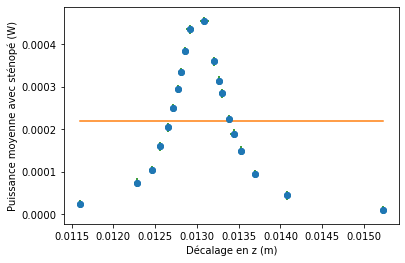

In [5]:
# calcul de l'écart-type et de la moyenne des décalages
Pavg_as = sum(decalage_as)/len(decalage_as) 
std_as = np.std(decalage_as)
# graphique
plt.scatter(decalage_as, moy_P_as)
plt.xlabel("Décalage en z (m)")
plt.ylabel("Puissance moyenne avec sténopé (W)")
plt.errorbar(decalage_as, moy_P_as, xerr = inc_tot_as_P, yerr = inc_lect_z, fmt='o', ecolor='g')
# les barres semblent être vraiment petites

# fit gaussien
def func(z, avg, std):
    return  (1/(2*np.sqrt(2*np.pi))) * np.exp(-(z-avg)**2 / (2*std**2)) 
popt, pcov = curve_fit(func, decalage_as, moy_P_as)
plt.plot(decalage_as, func(decalage_as, *popt))

### 1.2 Mesures sans sténopé

1.2.1 Calcul des incertitudes



In [15]:
'''
    ss: sans sténopé
    decalage_ss: position en z du troisième miroir [m]
    P_ss_min: puissance minimale mesurée dans un temps de mesure de 10 secondes [W]
    P_ss_max: puissance maximale mesurée dans un temps de mesure de 10 secondes [W]
    moy_P_ss: puissance moyenne mesurée dans un temps de mesure de 10 secondes [W]
    inc_tot_ss_P: incertitude totale sur la puissance pour les mesures sans sténopé [W]
'''

decalage_ss = np.sort((1e-3)*np.array([11.0, 10.50, 10.0, 9.50, 9.0, 8.50, 8.0, 7.5, 7.0, 6.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5]))
P_ss_min = (1e-6)*np.array([639, 640, 642, 643, 646, 645, 647, 649, 652, 657, 663, 650, 630, 650, 646, 650, 649, 644, 641, 638])
P_ss_max = (1e-6)*np.array([641, 642, 644, 645, 646, 647, 649, 651, 656, 663, 665, 656, 640, 652, 647, 652, 649, 644, 641, 638])
moy_P_ss = (np.array(P_ss_min) + np.array(P_ss_max)) / 2.0

inc_exp_ss = np.abs(np.subtract(P_ss_max, P_ss_min))

# calcul des incertitudes sur la puissance
inc_tot_ss_P = np.empty(len(inc_exp_ss), dtype=object) 
for i in range(len(inc_exp_ss)):
    inc_tot_ss_P[i] = np.sqrt(inc_exp_ss[i]**2+err_lect_P**2)

2.1.2 Graphique des résultats

Avec un fit gaussien sur les données. Le fit est décrit par: $P(z) = \frac{1}{\sigma \sqrt{2\pi}} \exp{\{-(x-\mu)^2/(2\sigma^2)}\} $, où $\sigma$ est l'écart-type et $\mu$ est la moyenne des puissances mesurées.

In [1]:
plt.scatter(decalage_ss, moy_P_ss)
plt.xlabel("Décalage en z (m)")
plt.ylabel("Puissance moyenne sans sténopé (W)")
plt.errorbar(decalage_ss, moy_P_ss, xerr = inc_tot_ss_P, yerr = inc_lect_z, fmt='o', ecolor='g')
# pas de barres d'erreur en x... mystère

NameError: name 'plt' is not defined